# Insurance Claim Prediction

Till now you have seen that how to solve the linear regression and regularization problem. Now in this project, you are going to predict the `Insurance claim ` using logistic regression. This dataset contains information on the insurance claim. each observation is different policyholder with various features like the age of the person, the gender of the policyholder, body mass index, providing an understanding of the body, number of children of the policyholder, smoking state of the policyholder and individual medical costs billed by health insurance.
 

## About the Dataset:
The snapshot of the data, you will be working on :

![Dataset](../images/insurance.png)


The dataset has details of 1338 Insurance claim with the following 8 features.

|Feature|Description|
|-------|--------|
|age|age of policyholder|
|sex|male(1)/female(0)|
|bmi|body mass index(kg / $m^2$) |
|children|number of children/dependents of policyholder|
|smoker|smoking state nonsmoker(0)/smoker(1)|
|region|residential area northeast(0)/northwest(1)/southeast(2)/southwest(3)|
|charges|medical cost|
|insuranceclaim|yes(1)/no(0)|


## Why solve this project?

After completing this project, you will have the better understanding of how to build a logistic regression model. In this project, you will apply the following concepts.

 
- Train-test split
- Correlation between the features 
- Logistic Regression
- Auc score
- Roc auc plot


# Data loading and splitting

The first step - you know the drill by now - load the dataset and see how it looks like. Additionally, split it into train and test set. 


## Instructions:

* Load dataset using pandas read_csv api in variable `df` and give file path as `path`.
* Display first 5 columns of dataframe `df`.
* Store all the features(independent values) in  a variable called `X`
* Store the target variable (dependent value) in a variable called `y`
* Split the dataframe into `X_train,X_test,y_train,y_test` using `train_test_split()` function. Use `test_size = 0.3` and `random_state = 6 `


## Hints:

* Use `X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.3,random_state=6)` to split the dataset.


## Test case

* df:
    - check the variable declaration
    - chaeck the df.shape == (1338, 8)
    - df type == pandas.core.frame.DataFrame
    
* type(X) == pandas.core.frame.DataFrame
* type(y) == pandas.core.frame.Series
* X.shape == (1338, 7)
* y.shape == (1338,)
* variable check X_train,X_test,y_train,y_test

In [8]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

In [9]:
# import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore')


# store the dataframe
df = pd.read_csv("../data/insurance2.csv")




# store independent variable
X = df.drop('insuranceclaim',axis=1)

# store dependent variable
y = df['insuranceclaim']

# spliting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.2,random_state=6)
# code ends here



## Success Message 

Congrats !

You have successfully loaded the dataset and split it into `train` and `test` set. 

# Outlier  Detection

Let's plot the `box plot` to check for the outlier .. 


## Instructions:

* Plot the boxplot for `X_train['bmi']`.
* Set quantile equal to `0.95`for `X_train['bmi']`. and store it in variable `q_value`.
* Check the value counts of the `y_train`


## Hint :

* Use `y_train.value_counts(normalize=True)` to check trhe value counts.


## Test case:

* variable check q_value.
* X_train.shape == (1016, 7)
* y_train.shape == (1016,)

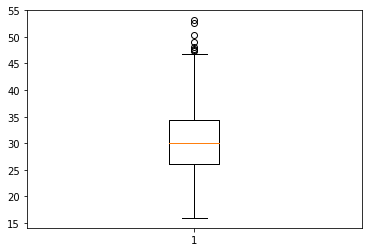

1070
1070


In [10]:
import matplotlib.pyplot as plt
% matplotlib inline

# plot the boxplot 

plt.boxplot(X_train['bmi'])

plt.show()
# set quantile (0.95)
q_value = X_train['bmi'].quantile(0.95)

# Check the value counts
y_train.value_counts(normalize=True)


#X_train = X_train[X_train['bmi'] < q_value]
#plt.boxplot(X_train['bmi'])
#plt.show()
print(len(X_train))

# remove the index from y_train
#y_train=y_train[X_train.index]
print(len(y_train))

## Success Message:

Congrats!

As we can see that there is an outlier. But if the `BMI` increases there is a very high chance that people will take the insurance. So, in this case, we are not going to remove the outlier we will keep it. So we can see that it is not necessary that outlier's must be removed or processed in every dataset. It depends on the relation of the feature with the target.

# Correlation Check !


Let's check the `pair_plot` for feature vs feature. This tells us which features are highly correlated with the other feature and help us predict it better logistic regression model. 


## Instructions:

* Find the correlation between the features which are stored in `'X_train'` and store the result in a variable called `'relation'`.

* print `relation`.

* plot `pairplot` for `X_train`.




## Hint:

* Use `sns.pairplot(X_train)` to plot the `pairplot`.


## Test case :

* Variable check relation
* check relation.shape == (7, 7)



**Feedback:** There is no actionable from this task, we are just checking on the correlation.

(7, 7)


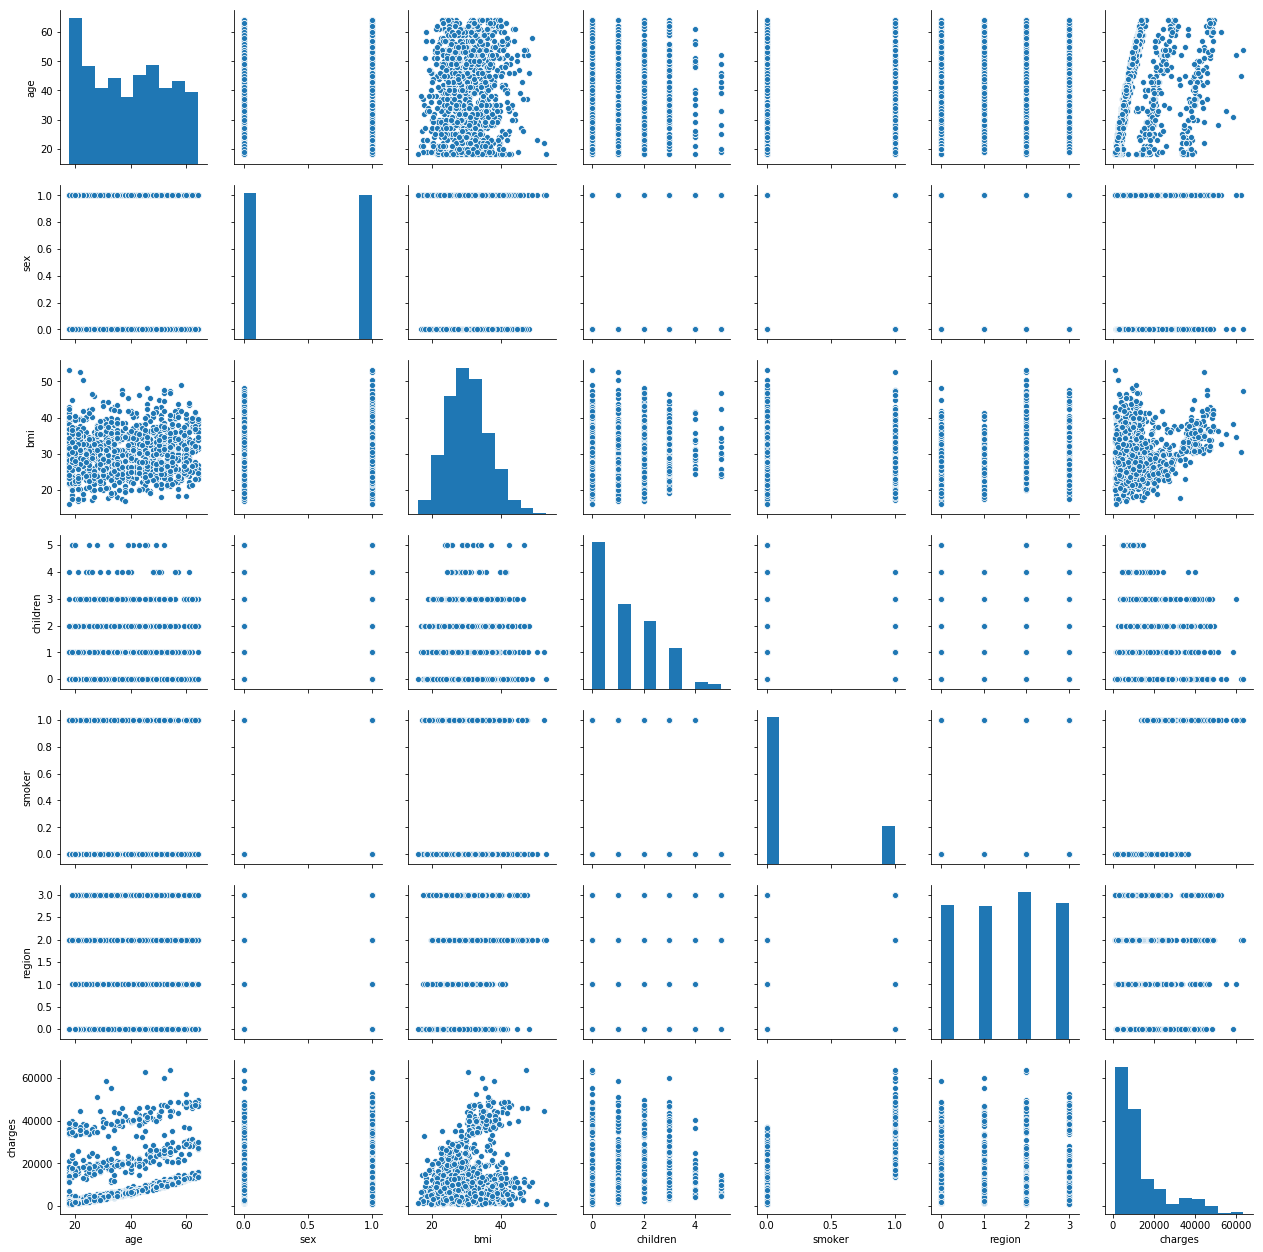

In [11]:
# Code starts here:

# check the correlation of X_train
relation = X_train.corr()
print(relation)

# create heatmap using seaborn
sns.pairplot(X_train)

## Success Message :

Congrats ! 
You have successfully plotted `pair plot`.

# predictor check!


Let's check the `count_plot` for different features vs target variable `insuranceclaim`. This tells us which features are highly correlated with the target variable `insuranceclaim` and help us predict it better. 
   




## Instructions :
* Create a datframe
* Create variable `cols` store the columns `'children','sex','region','smoker'` in it.
* Create subplot with `(nrows = 2 , ncols = 2)` and store it in variable's `fig ,axes`
* Create `for` loop to iterate through row.
* Create another `for` loop inside `for` to access column.
* create variable `col` and pass `cols[ i * 2 + j]`.
* Using seaborn plot the `countplot` where `x=X_train[col], hue=y_train, ax=axes[i,j]`


## Hints :


* Use `for i in range(0,2)` to access row 
            
            `for j in range(0,2):` to access column. 

* Use `sns.countplot(x=X_train[col], hue=y_train, ax=axes[i,j])` for `countplot`.

## Test case:

* variable check cols
* cols == ['children','sex','region','smoker']

* variable check fig , axes




**Feedback:** Some actionable is required from count plot

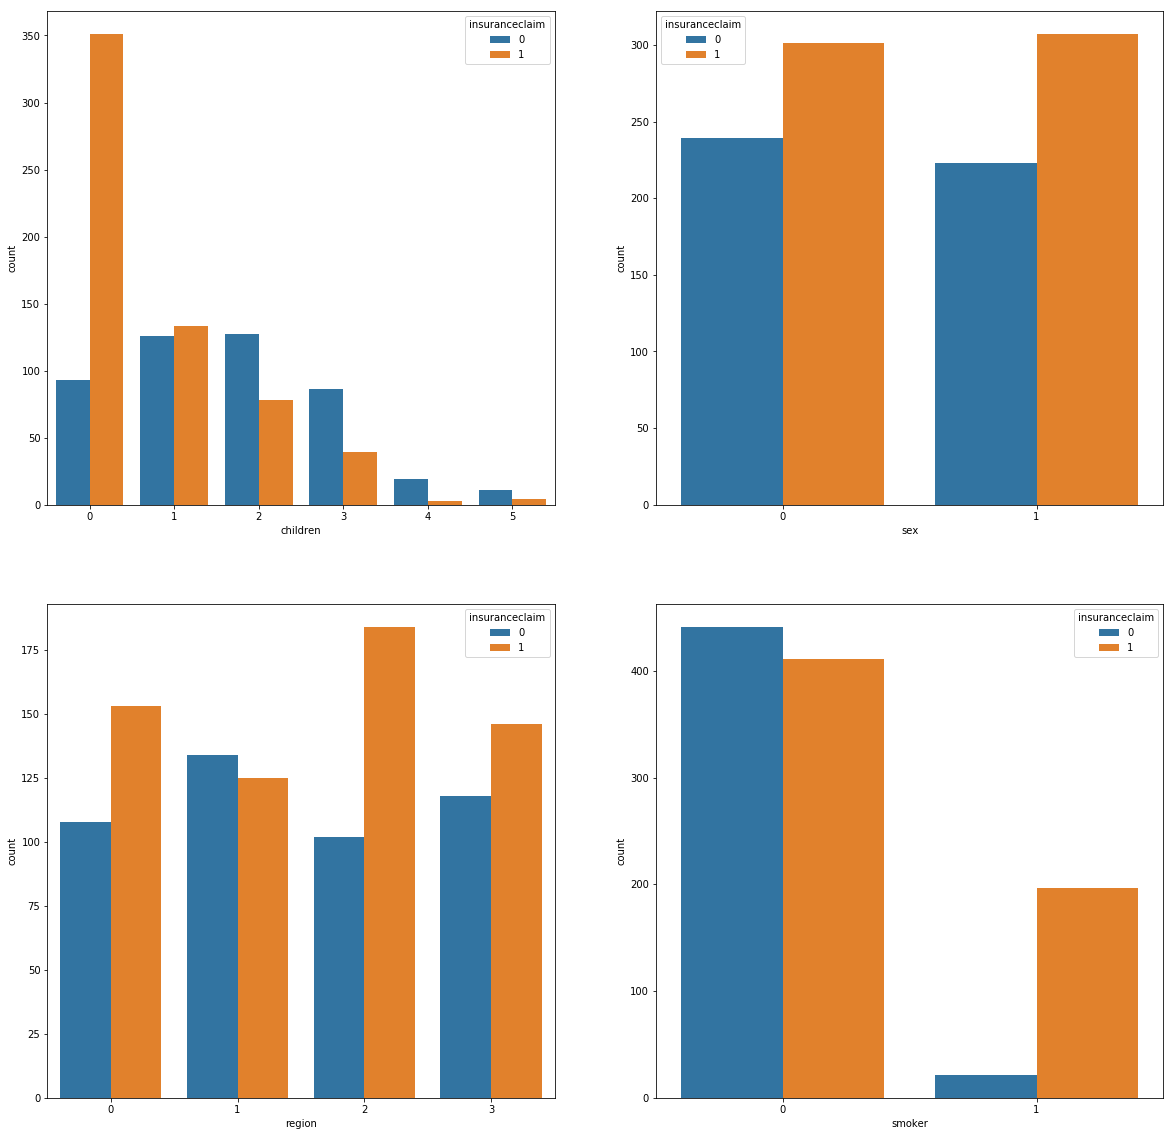

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# code starts here

# store categorical variable
cols = ['children','sex','region','smoker']
        


# create subplot 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,20))

# create loop for plotting countplot

for i in range(0,2):
    for j in range(0,2):
             col=cols[i*2 + j]
             sns.countplot(x=X_train[col], hue=y_train, ax=axes[i,j])

# Code ends here



## Success Message

Congrats!

You have successfully plotted `countplot` for feature vs target variable `insuranceclaim`.

## Is my Insuranceclaim prediction right?

Now let's come to the actual task, using logistic regression to predict the insuranceclaim. We will select best model by cross-validation using Grid Search. 



## Instructions:

* You are given a list of values for regularization parameters for logistic regression model.
* Instantiate a logistic regression model with `LogisticRegression()` and save it to a variable called `'lr'`.
* Inside `GridSearchCV()` pass `estimator` as the logistic model, `param_grid=parameters`. to do grid search on the logistic regression model store the result in variable `grid`. 
* Fit the model on the training data `X_train and y_train`.
* Make predictions on the `X_test` features and save the results in a variable called `'y_pred'`.
* Calculate accuracy for `grid` and store the result in  the variable `accuracy`
* print `accuracy`.


## Hint :

* Use `lr.score(X_test,y_test)` to calculate the accuracy.
* Use `GridSearchCV(estimator=lr, param_grid=parameters)` for grid search.


## Test case :

* check the variable `lr`
* check the variable `y_pred`
* check the variable `accuracy`
* check the variable `grid`
* lr == LogisticRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
* np.round(accuracy) == np.round(0.8544776119402985, 2 )



In [13]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression


# parameters for grid search
parameters = {'C':[0.1,0.5,1,5]}

# Code starts here

# instantiate logistic regression model
lr=LogisticRegression(random_state=9)
# grid search on logistic regression

grid = GridSearchCV(estimator=lr, param_grid=parameters)
grid.fit(X_train, y_train)

# make predictions 
y_pred = grid.predict(X_test)
accuracy= grid.score(X_test,y_test)

print(accuracy)



0.8544776119402985


## Success Message :

Congrats !

You have successfully applied `Logistic Regression Model` and calculated the accuracy using `GridSearchCV` for prediction of insuranceclaim.

# Performance of a classifier !

Now let's visualize the performance of a binary classifier. Check the performance of the classifier using `roc auc curve`. 


## Instructions:

* Calculate the `roc_auc_score` and store the result in variable `score`.

* Predict the probability for the `X_test == 1` and store the result in `y_pred_proba`.

* Use `metrics.roc_curve` to calculate the `fpr` and `tpr` and store the result in variables `fpr, tpr,`.

* Calculate the roc_auc score of `y_test` and `y_pred_proba` and store it in variable called `roc_auc`. 

* Plot auc curve of `'auc'` using the line `plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))`.


## Hints:

* Use `y_pred_proba = grid.predict_proba(X_test)[:,1]` to calculate the probability for 1.


## Test case:

* variable declaration `score`
* np.round(score,2) == np.round(0.8454968944099378, 2)
* variable declaration `y_pred_proba`.
* np.round(y_pred_proba[0],2) == np.round(0.31732117635171136,2)
* variable check `roc_auc`.
* np.round(roc_auc,2) == np.round(0.9136098310291859 , 2)




0.8454968944099378
0.31732117635171136
0.9136098310291859


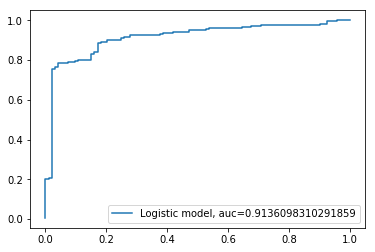

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn import metrics

score = roc_auc_score(y_pred , y_test)
print(score)
y_pred_proba = grid.predict_proba(X_test)[:,1]
print(y_pred_proba[0])
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(roc_auc)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Success Message :

Congrats!

You have successfully plotted the `roc_auc_curve` for binary classifier.